1. Estimate and visualize the background signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

1.1 Estimate and visualize the background signal of img_1

In [2]:
# Import img_1 as 8 bit image
img1_8b = cv.imread('Data/img_1.tif',0)

In [3]:
def display(im,cmap=None):
    fig,ax = plt.subplots(1,figsize = (12,12))
    plt.imshow (im,cmap=cmap)

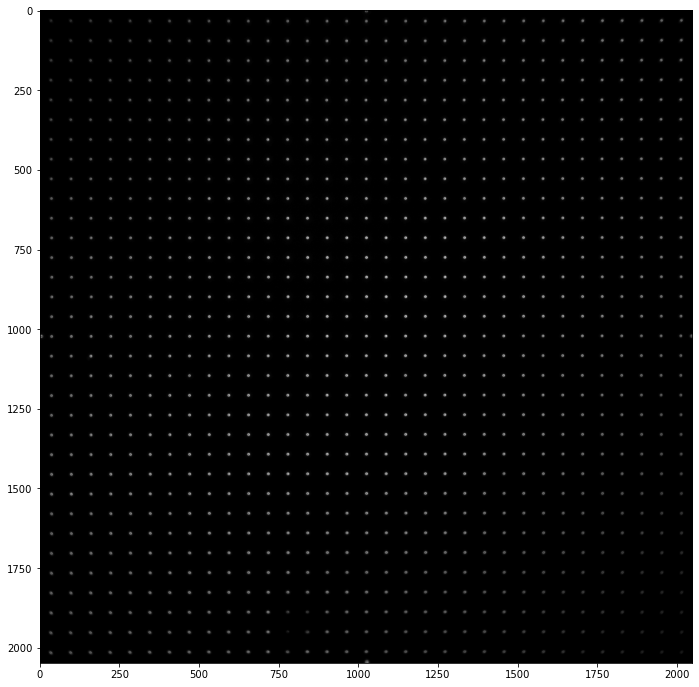

In [4]:
display(img1_8b,'gray')

In [5]:
# Apply otsu threshold on img_1
thr_otsu, otsu_mask = cv.threshold(img1_8b,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
thr_otsu

14.0

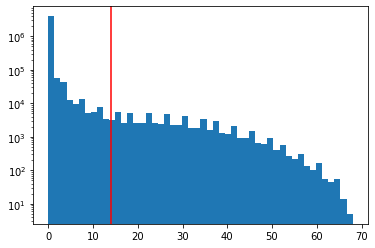

In [26]:
plt.hist(img1_8b.flatten(),bins=50)
plt.yscale('log')
plt.axvline(thr_otsu, c='r',label='Otsu_threshold')

In [6]:
from skimage.measure import label

In [7]:
# Plot the relationship between threshold and detected spots
thres = []
num_spots = []
for i in range (1,14):
    thr, mask = cv.threshold(img1_8b,i,255,cv.THRESH_BINARY)
    label_mask = np.amax(label(mask))
    thres.append(i)
    num_spots.append(label_mask)

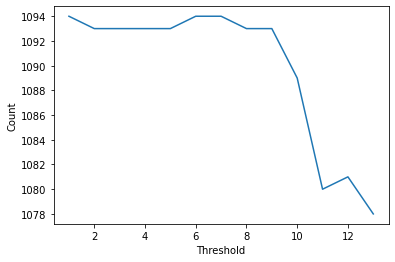

In [8]:
plt.plot(thres,num_spots)
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.show()

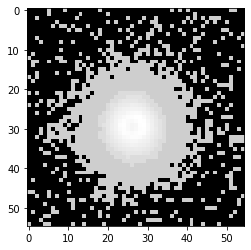

In [9]:
# display a single spot in img_1 with enhanced contrast
img1_spot=img1_8b[500:555,750:805]
plt.imshow (cv.equalizeHist(img1_spot),'gray')

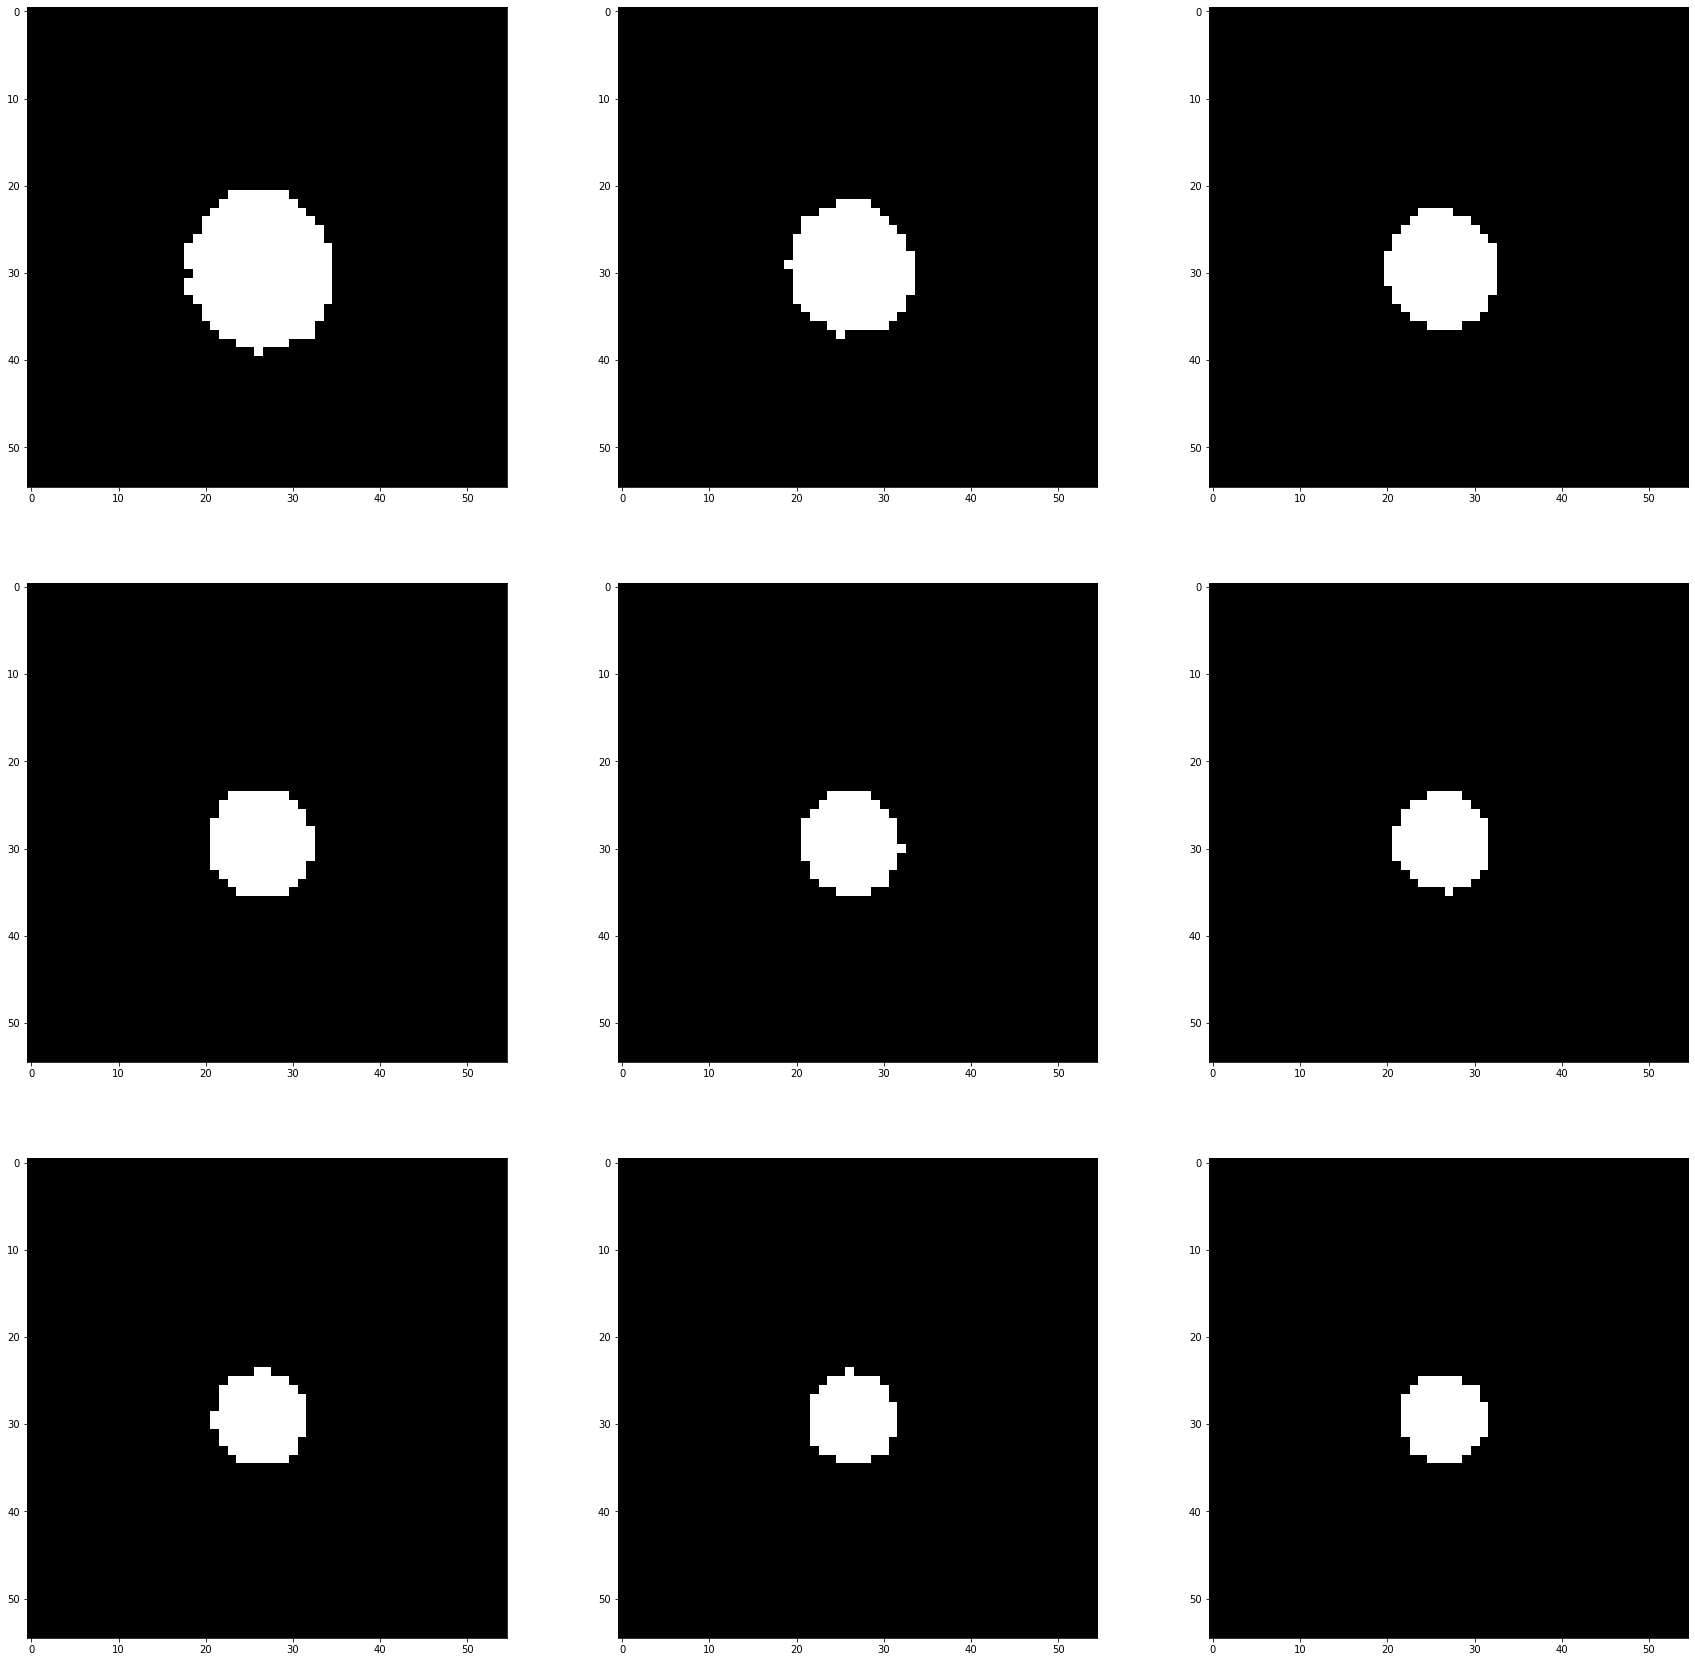

In [10]:
# Testing mask with binary threshold values between 1 to 9
plt.figure (figsize=(30,30))
for i in range (1,10):
    thr1, mask1 = cv.threshold(img1_8b,i,255,cv.THRESH_BINARY)
    plt.subplot(3,3,i)
    plt.imshow (mask1[500:555,750:805],'gray')

In [11]:
# Create binary mask with threshold = 1 
thr2, mask2 = cv.threshold(img1_8b,1,255,cv.THRESH_BINARY)

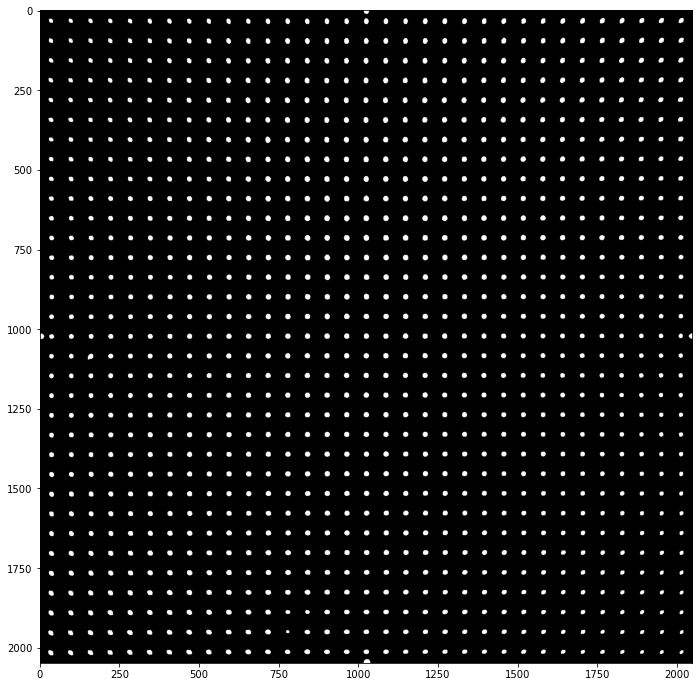

In [12]:
# Clean the background and fill the holes in the mask
kernel1 = np.ones((5,5),np.uint8)
mask2 = cv.morphologyEx(mask2,cv.MORPH_OPEN, kernel1)
mask2 = cv.morphologyEx(mask2,cv.MORPH_CLOSE, kernel1)
display (mask2, 'gray')

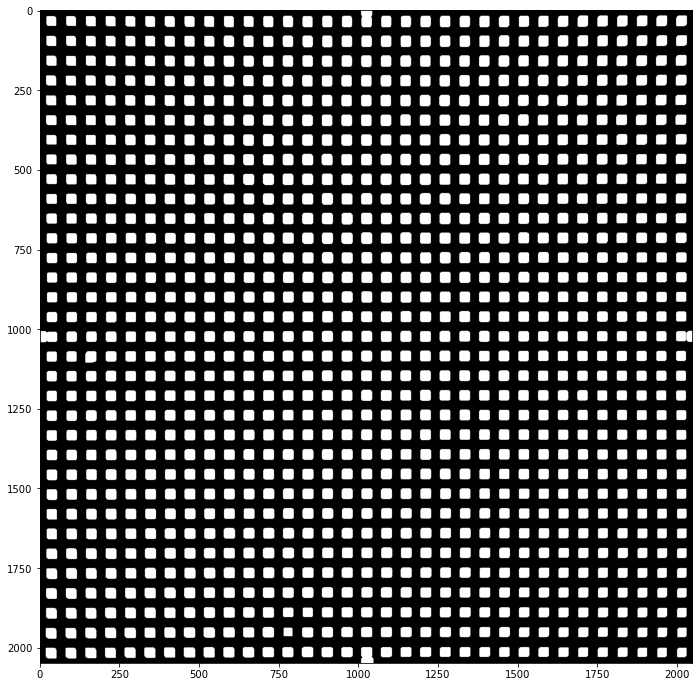

In [13]:
# Dilate the mask to fully cover each spot
kernel = np.ones((10,10),np.uint8)
mask2_dil = cv.dilate(mask2,kernel,iterations = 2)
display (mask2_dil,'gray')

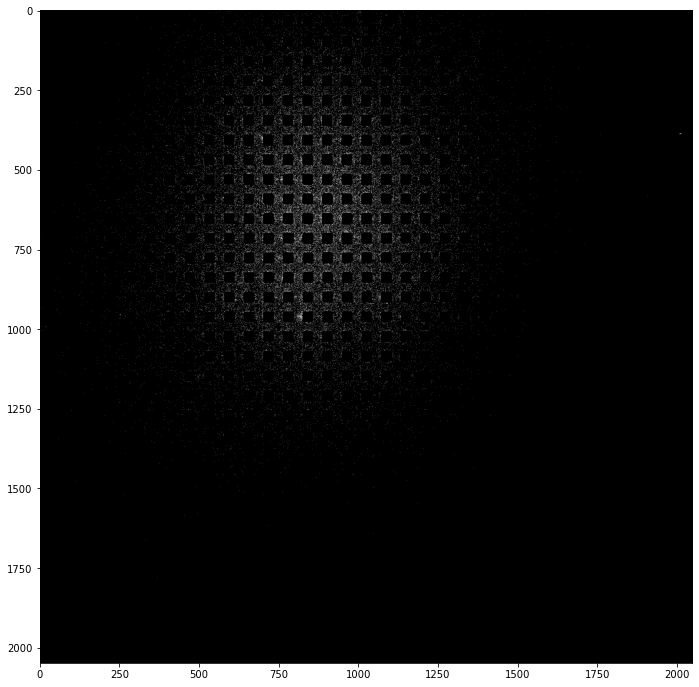

In [14]:
# Apply reversed mask on the original image to show the background
mask2_inv = cv.bitwise_not(mask2_dil)
bkg = cv.bitwise_and(img1_8b,img1_8b,mask=mask2_inv)
eq_bkg = cv.equalizeHist(bkg)
display (eq_bkg,'gray')

In [15]:
# Estimate the average backgrond signal of img_1 (16 bit image)
img1_16b = cv.imread('Data/img_1.tif', -1).astype(np.float32)/257
img1_bkg = cv.bitwise_and(img1_16b,img1_16b,mask=mask2_inv)
avg_img1_bkg = np.average(img1_bkg[img1_bkg>0])
print (avg_img1_bkg)

0.7279858


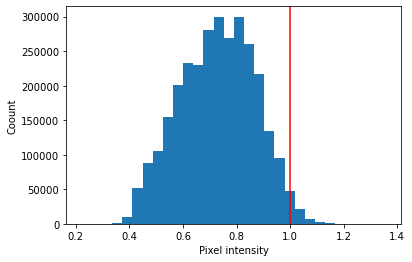

In [23]:
# Show the intensity distribution of the backgrond signals
plt.hist(img1_bkg[img1_bkg>0],bins=30)
plt.xlabel('Pixel intensity')
plt.ylabel('Coount')
plt.axvline(thr2, c='r',label='Threshold')

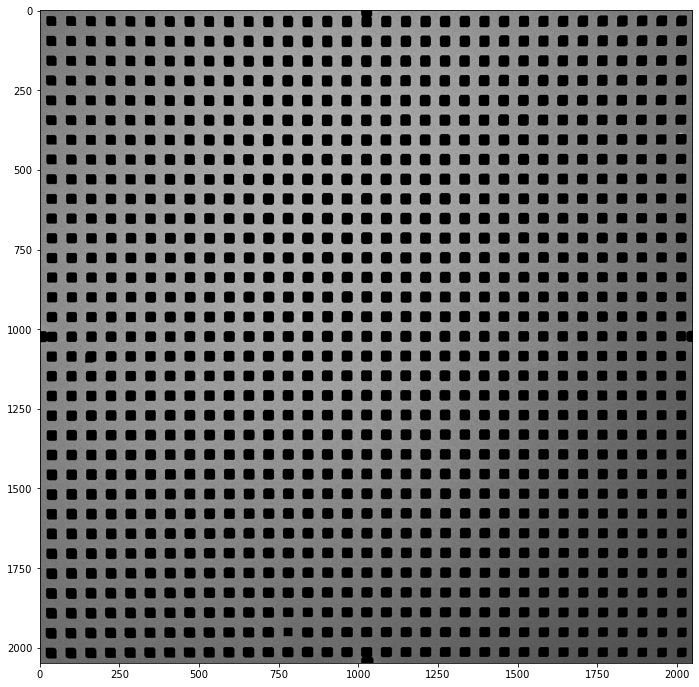

In [401]:
# Visualize the true background of img_1
display (img1_bkg,'gray')

1.2 Estimate and visualize the background signal of img_2

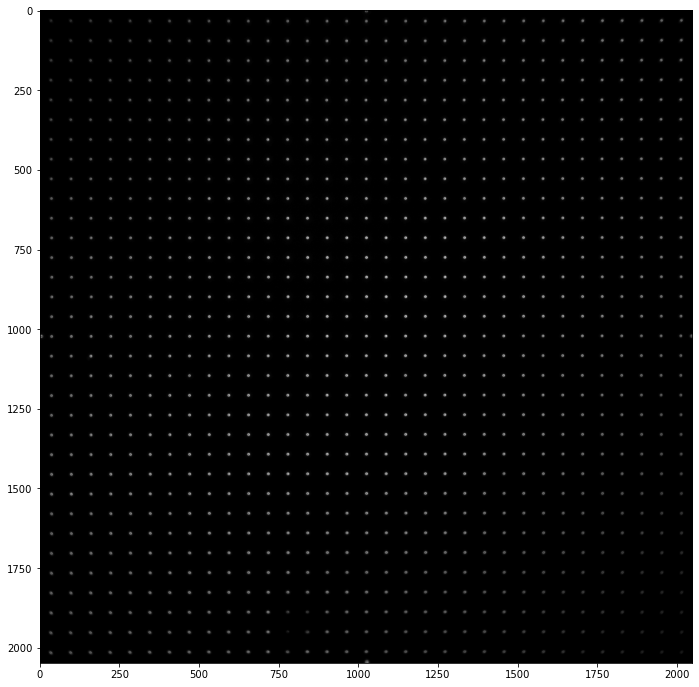

In [250]:
# Import and display img_2
img2_8b = cv.imread('Data/img_1.tif',0)
display(img2_8b,'gray')

In [251]:
# Apply otsu threshold on img_2
thr_otsu, otsu_mask = cv.threshold(img2_8b,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
thr_otsu

14.0

In [252]:
thres = []
num_spots = []
for i in range (1,14):
    thr, mask = cv.threshold(img1_8b,i,255,cv.THRESH_BINARY)
    label_mask = np.amax(label(mask))
    thres.append(i)
    num_spots.append(label_mask)

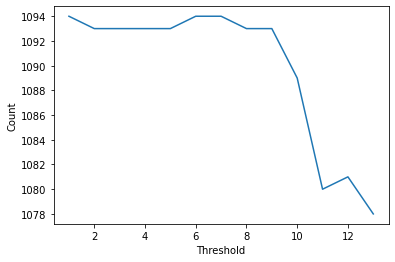

In [253]:
plt.plot(thres,num_spots)
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.show()

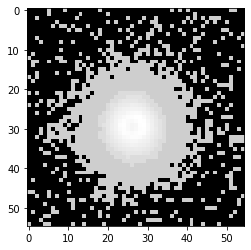

In [254]:
# display a single spot with enhanced contrast
img2_spot=img2_8b[500:555,750:805]
plt.imshow (cv.equalizeHist(img2_spot),'gray')

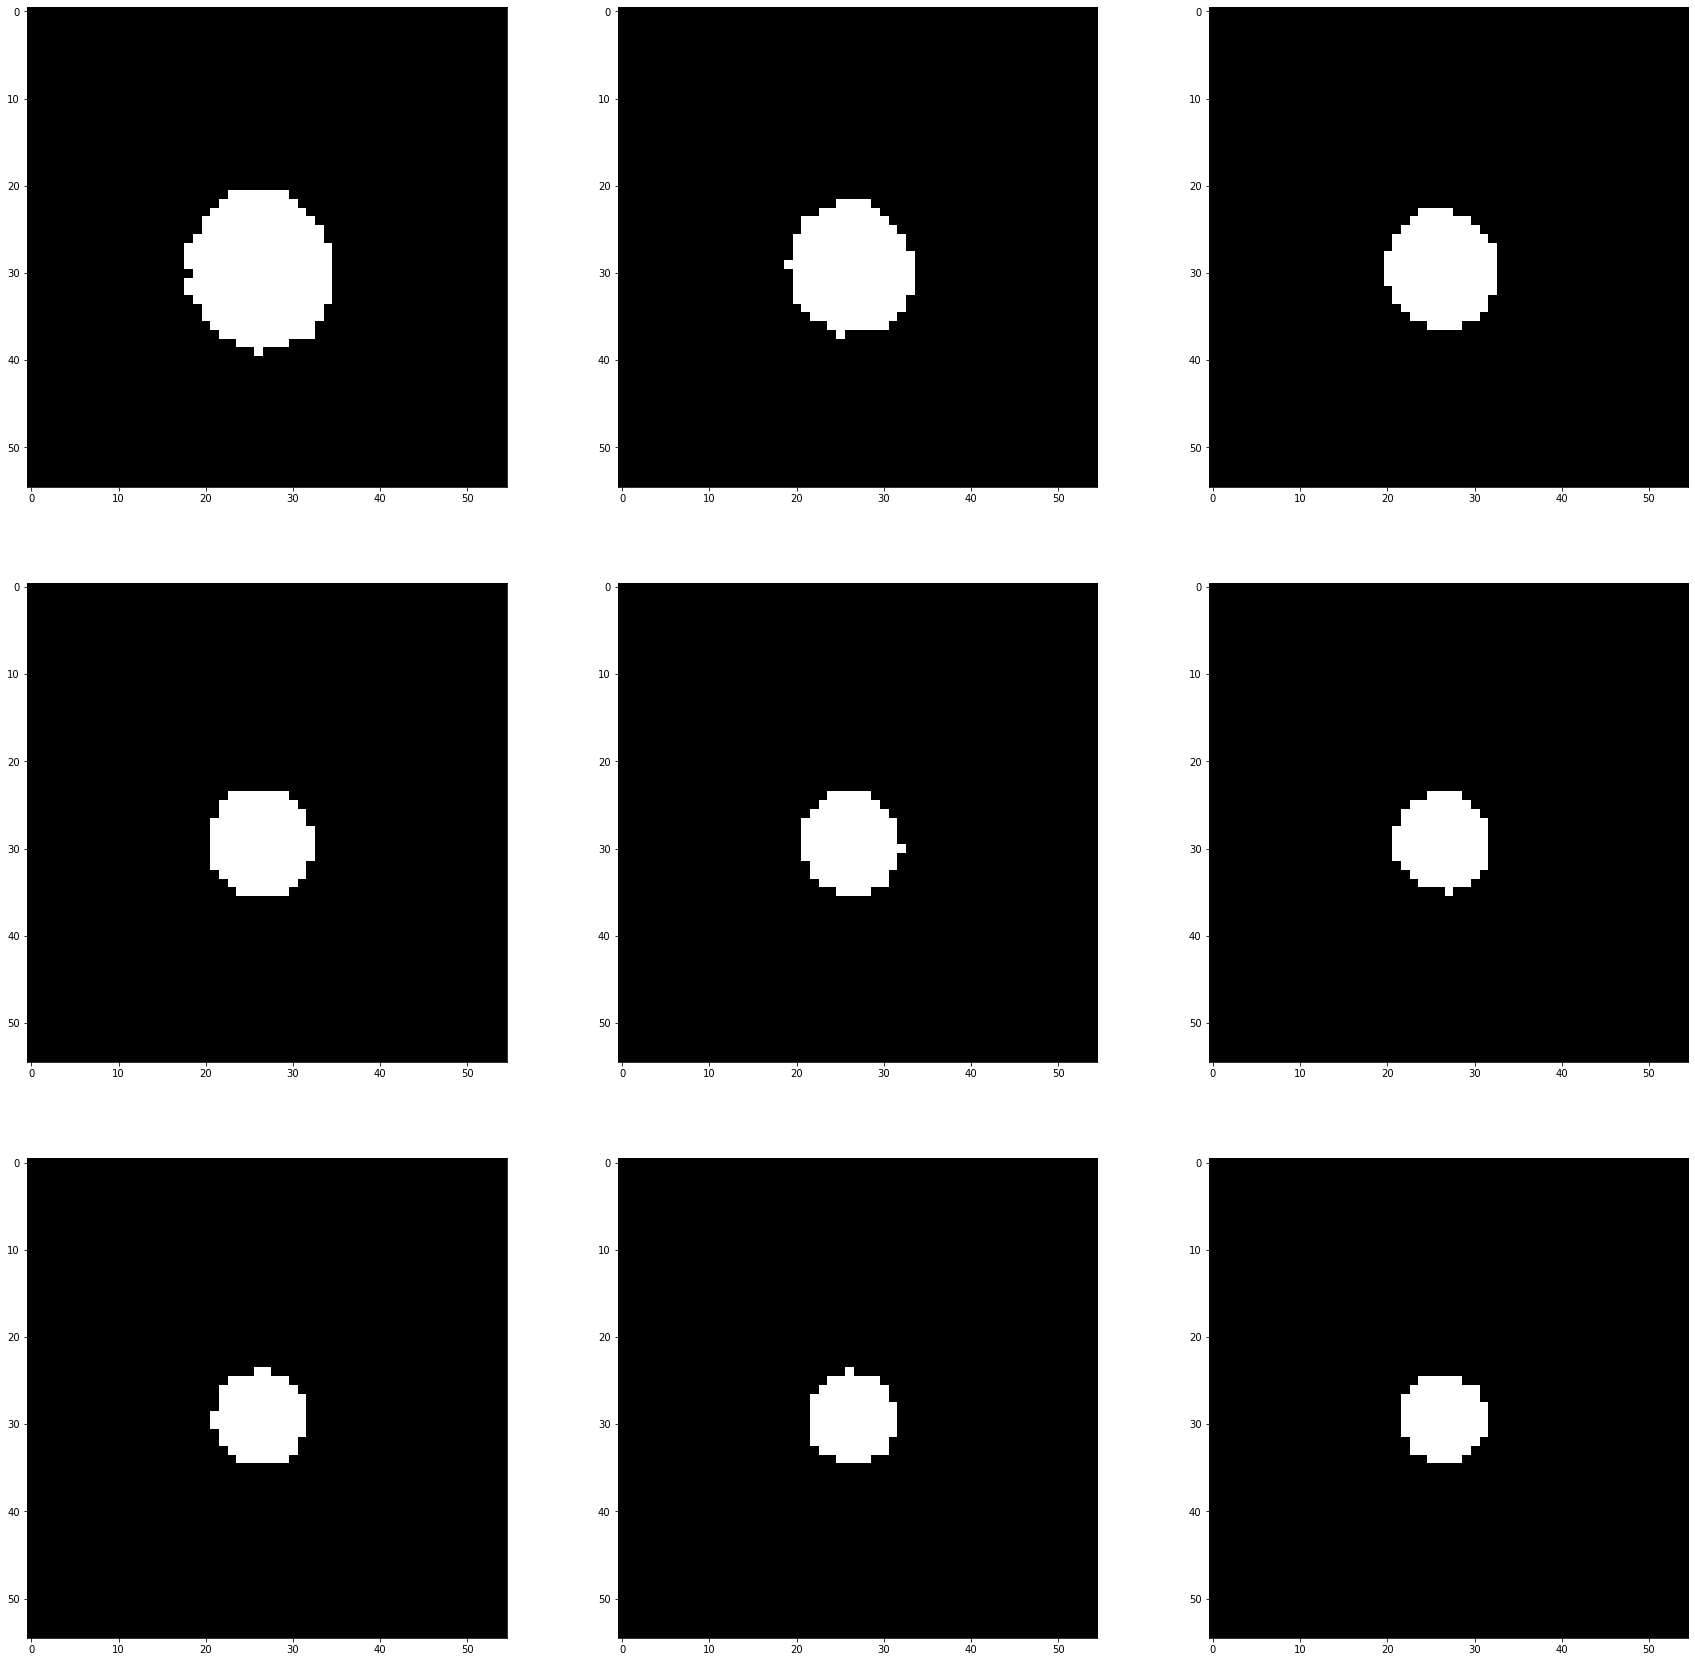

In [255]:
# Testing mask with binary threshold values between 1 to 9
plt.figure (figsize=(30,30))
for i in range (1,10):
    thr1_img2, mask1_img2 = cv.threshold(img2_8b,i,255,cv.THRESH_BINARY)
    plt.subplot(3,3,i)
    plt.imshow (mask1_img2[500:555,750:805],'gray')

In [256]:
# Create binary mask with threshold = 1 
thr2_img2, mask2_img2 = cv.threshold(img1_8b,1,255,cv.THRESH_BINARY)

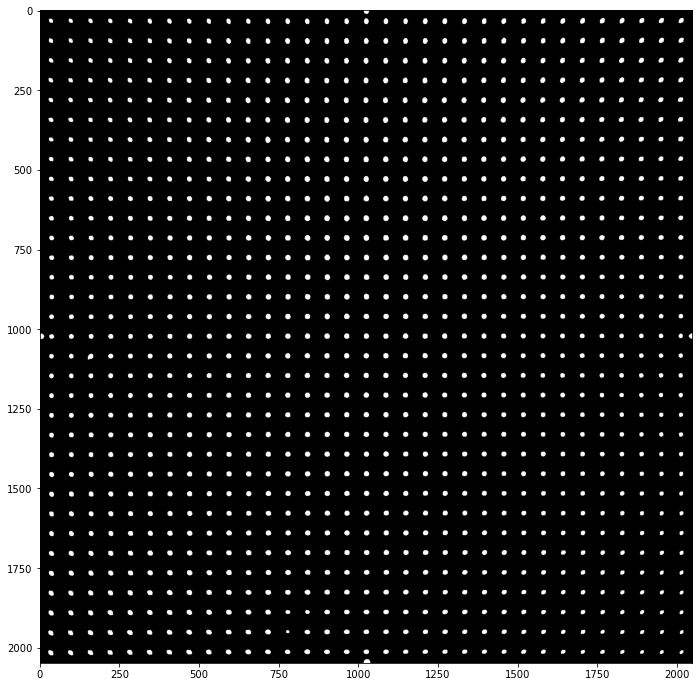

In [424]:
# Clean the background and fill the holes in the mask
mask2_img2 = cv.morphologyEx(mask2,cv.MORPH_OPEN, kernel1)
mask2_img2 = cv.morphologyEx(mask2,cv.MORPH_CLOSE, kernel1)
display (mask2_img2, 'gray')

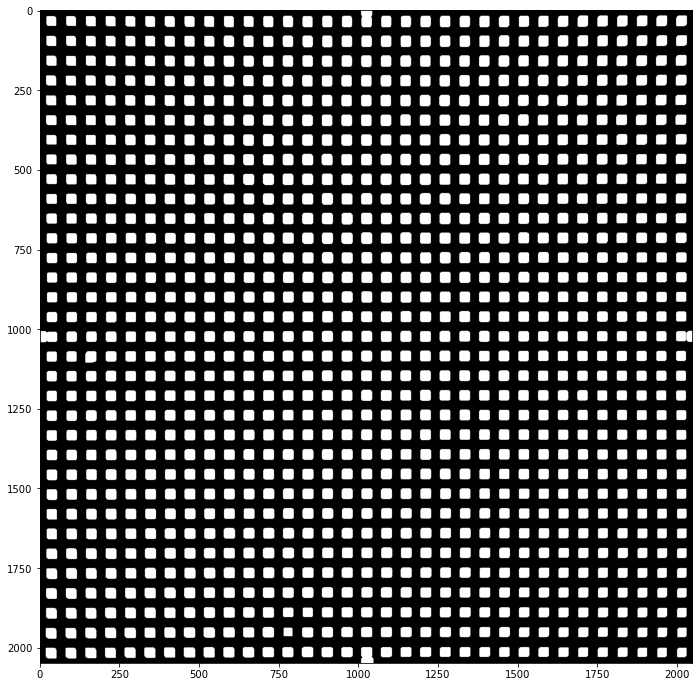

In [425]:
# Dilate the mask to fully cover each spot
kernel = np.ones((10,10),np.uint8)
mask2_dil_img2 = cv.dilate(mask2_img2,kernel,iterations = 2)
display (mask2_dil_img2,'gray')

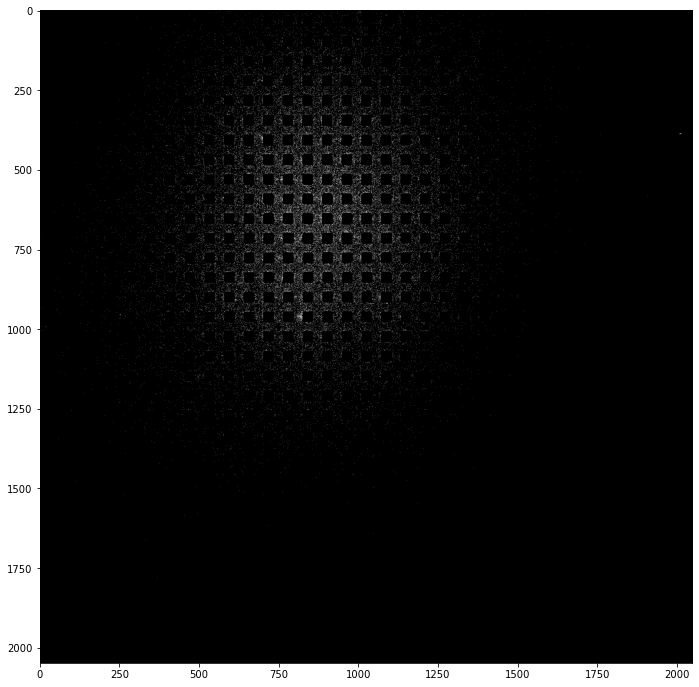

In [426]:
# Apply mask on the original image to show the background
mask2_inv_img2 = cv.bitwise_not(mask2_dil_img2)
bkg2 = cv.bitwise_and(img2_8b,img2_8b,mask=mask2_inv_img2)
eq_bkg2 = cv.equalizeHist(bkg2)
display (eq_bkg2,'gray')

In [427]:
# Estimate the average backgrond signal of img_2
img2_16b = cv.imread('Data/img_2.tif', -1).astype(np.float32)/257
img2_bkg = cv.bitwise_and(img2_16b,img2_16b,mask=mask2_inv_img2)
avg_img2_bkg = np.average(img2_bkg[img2_bkg>0])
print (avg_img2_bkg)

0.75218546


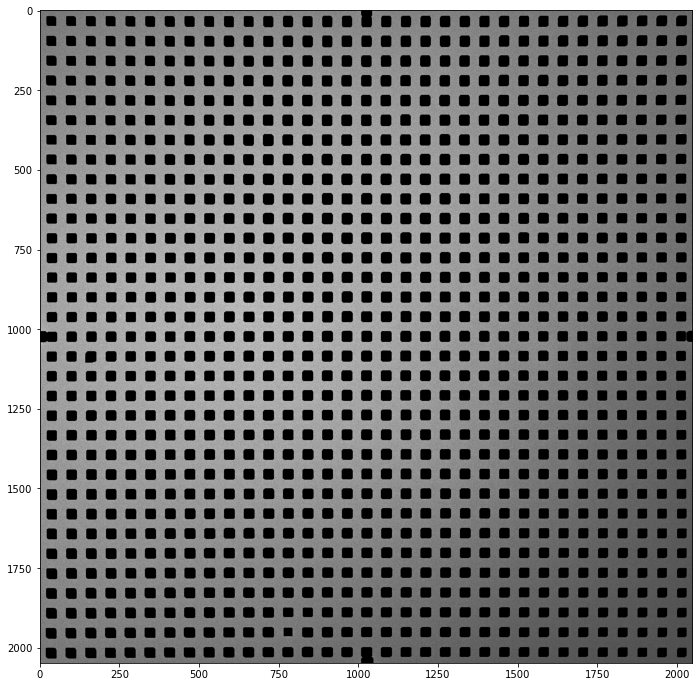

In [428]:
# Visualize the true background
display (img2_bkg,'gray')

3. Automatically detects each individual spot 

3.1 Detect the spots in img_1

In [261]:
# Detect the edges of spot mask in img_1
contours, hierarchy = cv.findContours(mask2.copy(), cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE) #cv.RETR_EXTERNAL

In [262]:
# Convert img_1 to RGB image
img1_rgb = cv.cvtColor(img1_8b,cv.COLOR_GRAY2RGB)

In [264]:
# Draw spot detection outline on img_1
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv.drawContours(img1_rgb, contours, i, (255, 0, 0), 2)

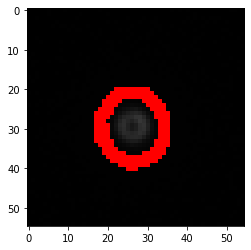

In [266]:
# Display the detection of an indivisual spot
plt.imshow (img1_rgb[500:555,750:805])

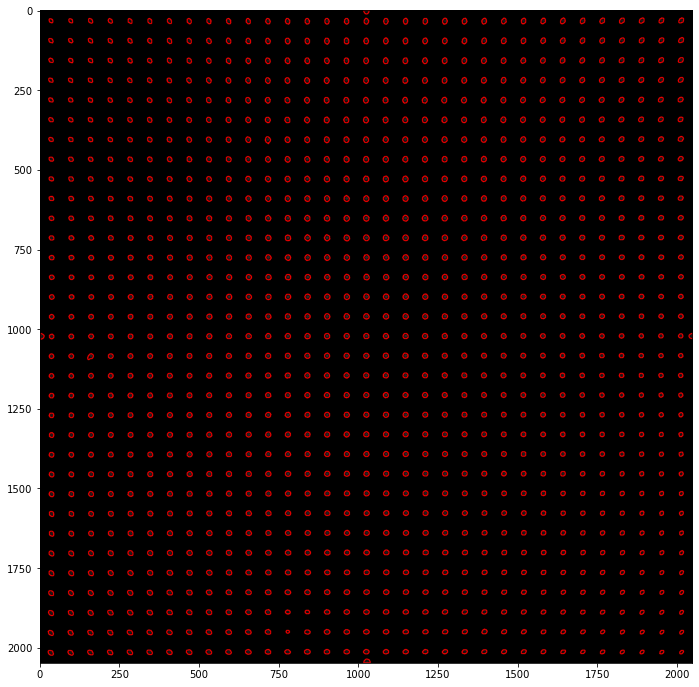

In [569]:
# Display the detectin of all spots in img_1
display (img1_rgb)

3.2 Detect the spots in img_2

In [267]:
# Detect the edges of spot mask in img_2
contours, hierarchy = cv.findContours(mask2_img2.copy(), cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

In [268]:
# Convert img_2 to RGB image
img2_rgb = cv.cvtColor(img2_8b,cv.COLOR_GRAY2RGB)

In [269]:
# Draw spot detection outline on img_2
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv.drawContours(img2_rgb, contours, i, (255, 0, 0), 2)

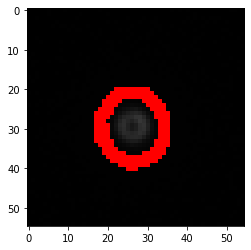

In [270]:
# Display the detection of an indivisual spot
plt.imshow (img2_rgb[500:555,750:805])

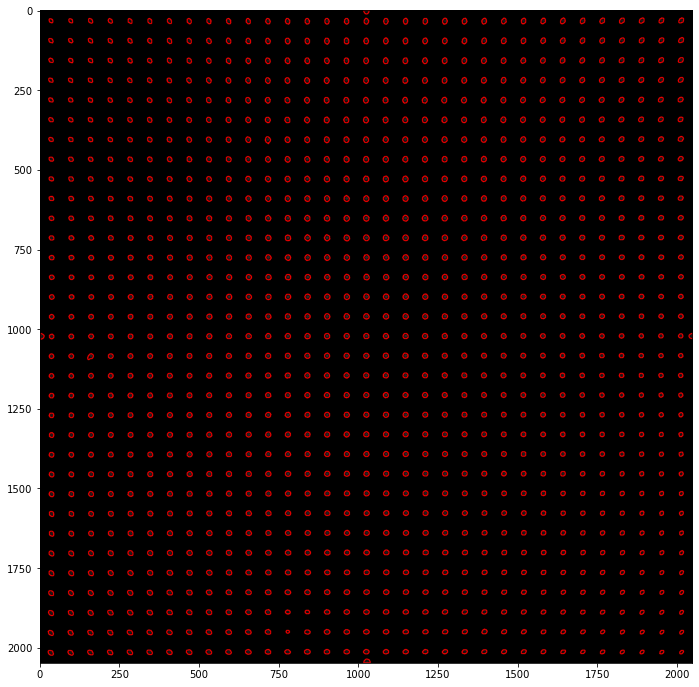

In [569]:
# Display the detectin of all spots in img_2
display (img2_rgb)

4. Measure intensity distribution, dynamic range, contrast to the background and sharpness of each spot

4.1 Intensity distribution measurement

In [429]:
# Apply spot detection mask on img_1 to remove background from image
img1_fg = cv.bitwise_and (img1_16b,img1_16b,mask=mask2)

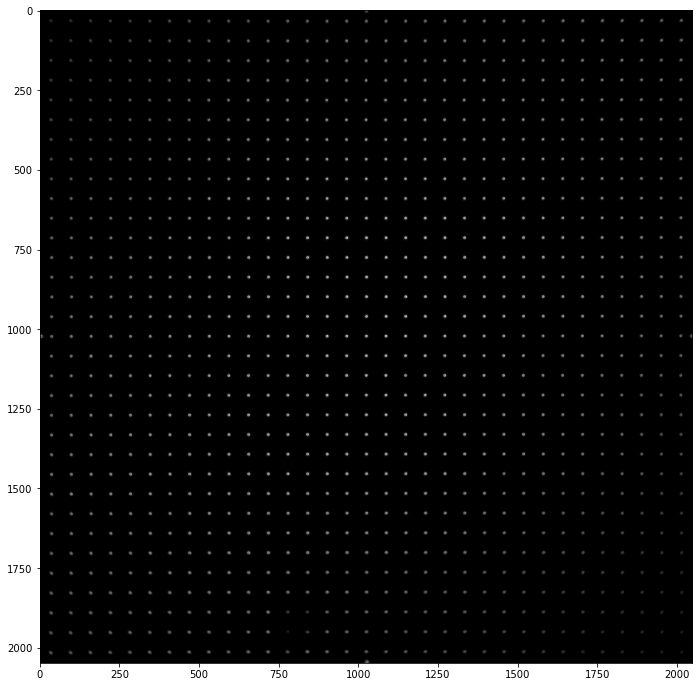

In [430]:
# Display forground of img_1
display (img1_fg, 'gray')

In [431]:
# Label the forground signals of img_1
img1_label = label (mask2)
img1_label.max()

1093

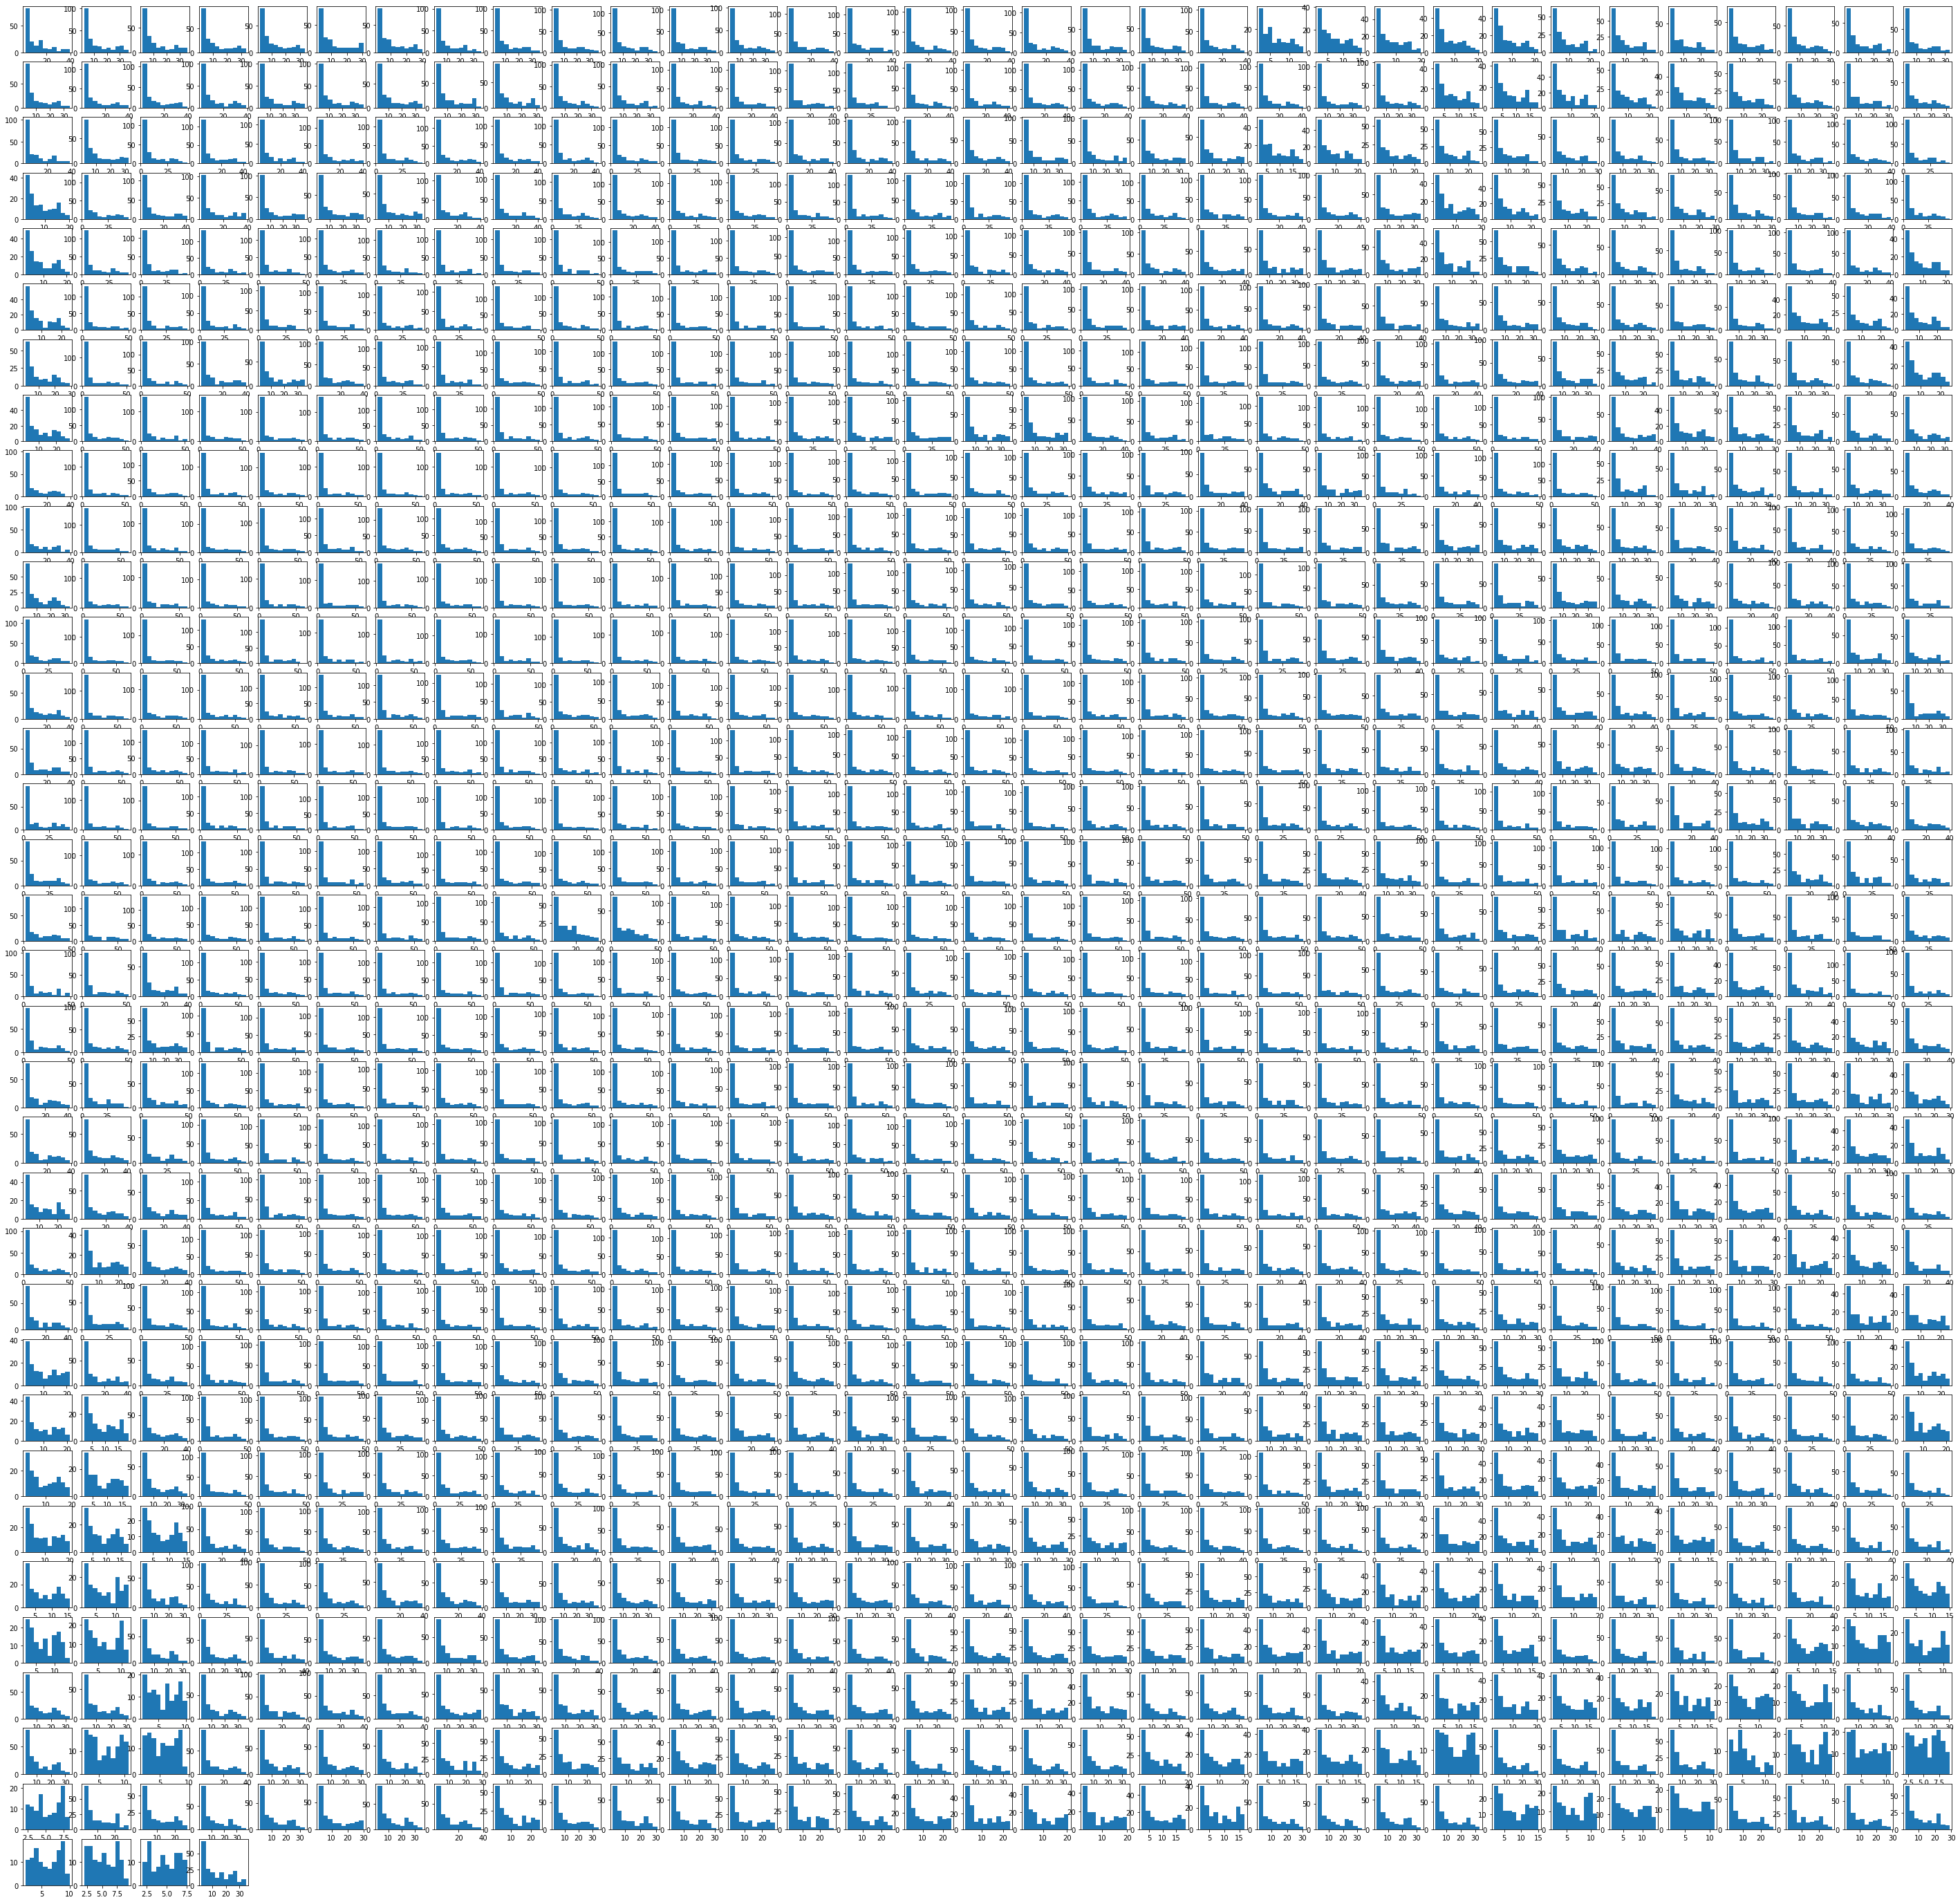

In [433]:
# Measure the intensity distribution of each spot in img_1
plt.figure (figsize = (50,50))
for i in range (0,img1_label.max()):
    plt.subplot(34,33,i+1)
    plt.hist(img1_16b[img1_label==i+1])

In [434]:
# Apply spot detection mask on img_2 to remove background from image
img2_fg = cv.bitwise_and (img2_16b,img2_16b,mask=mask2_img2)

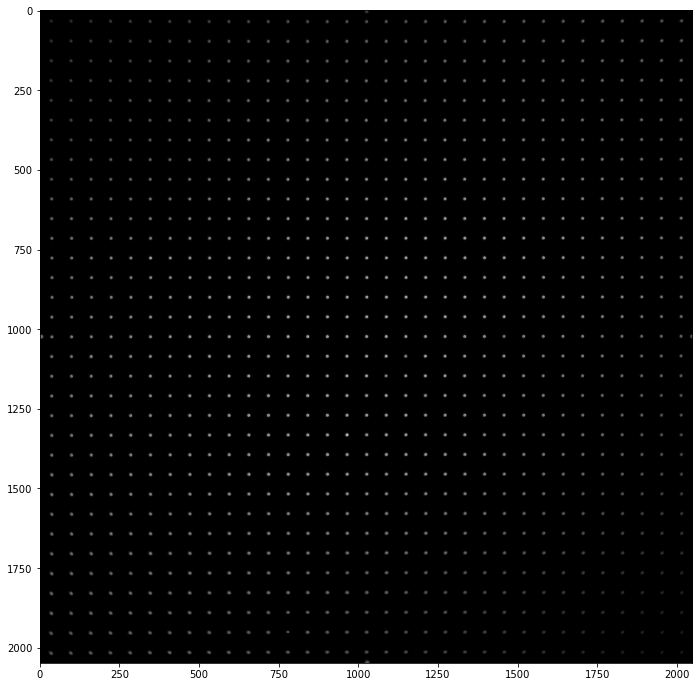

In [435]:
# Display forground of img_2
display (img2_fg, 'gray')

In [436]:
# Label the forground signals of img_2
img2_label = label (mask2_img2)
img2_label.max()

1093

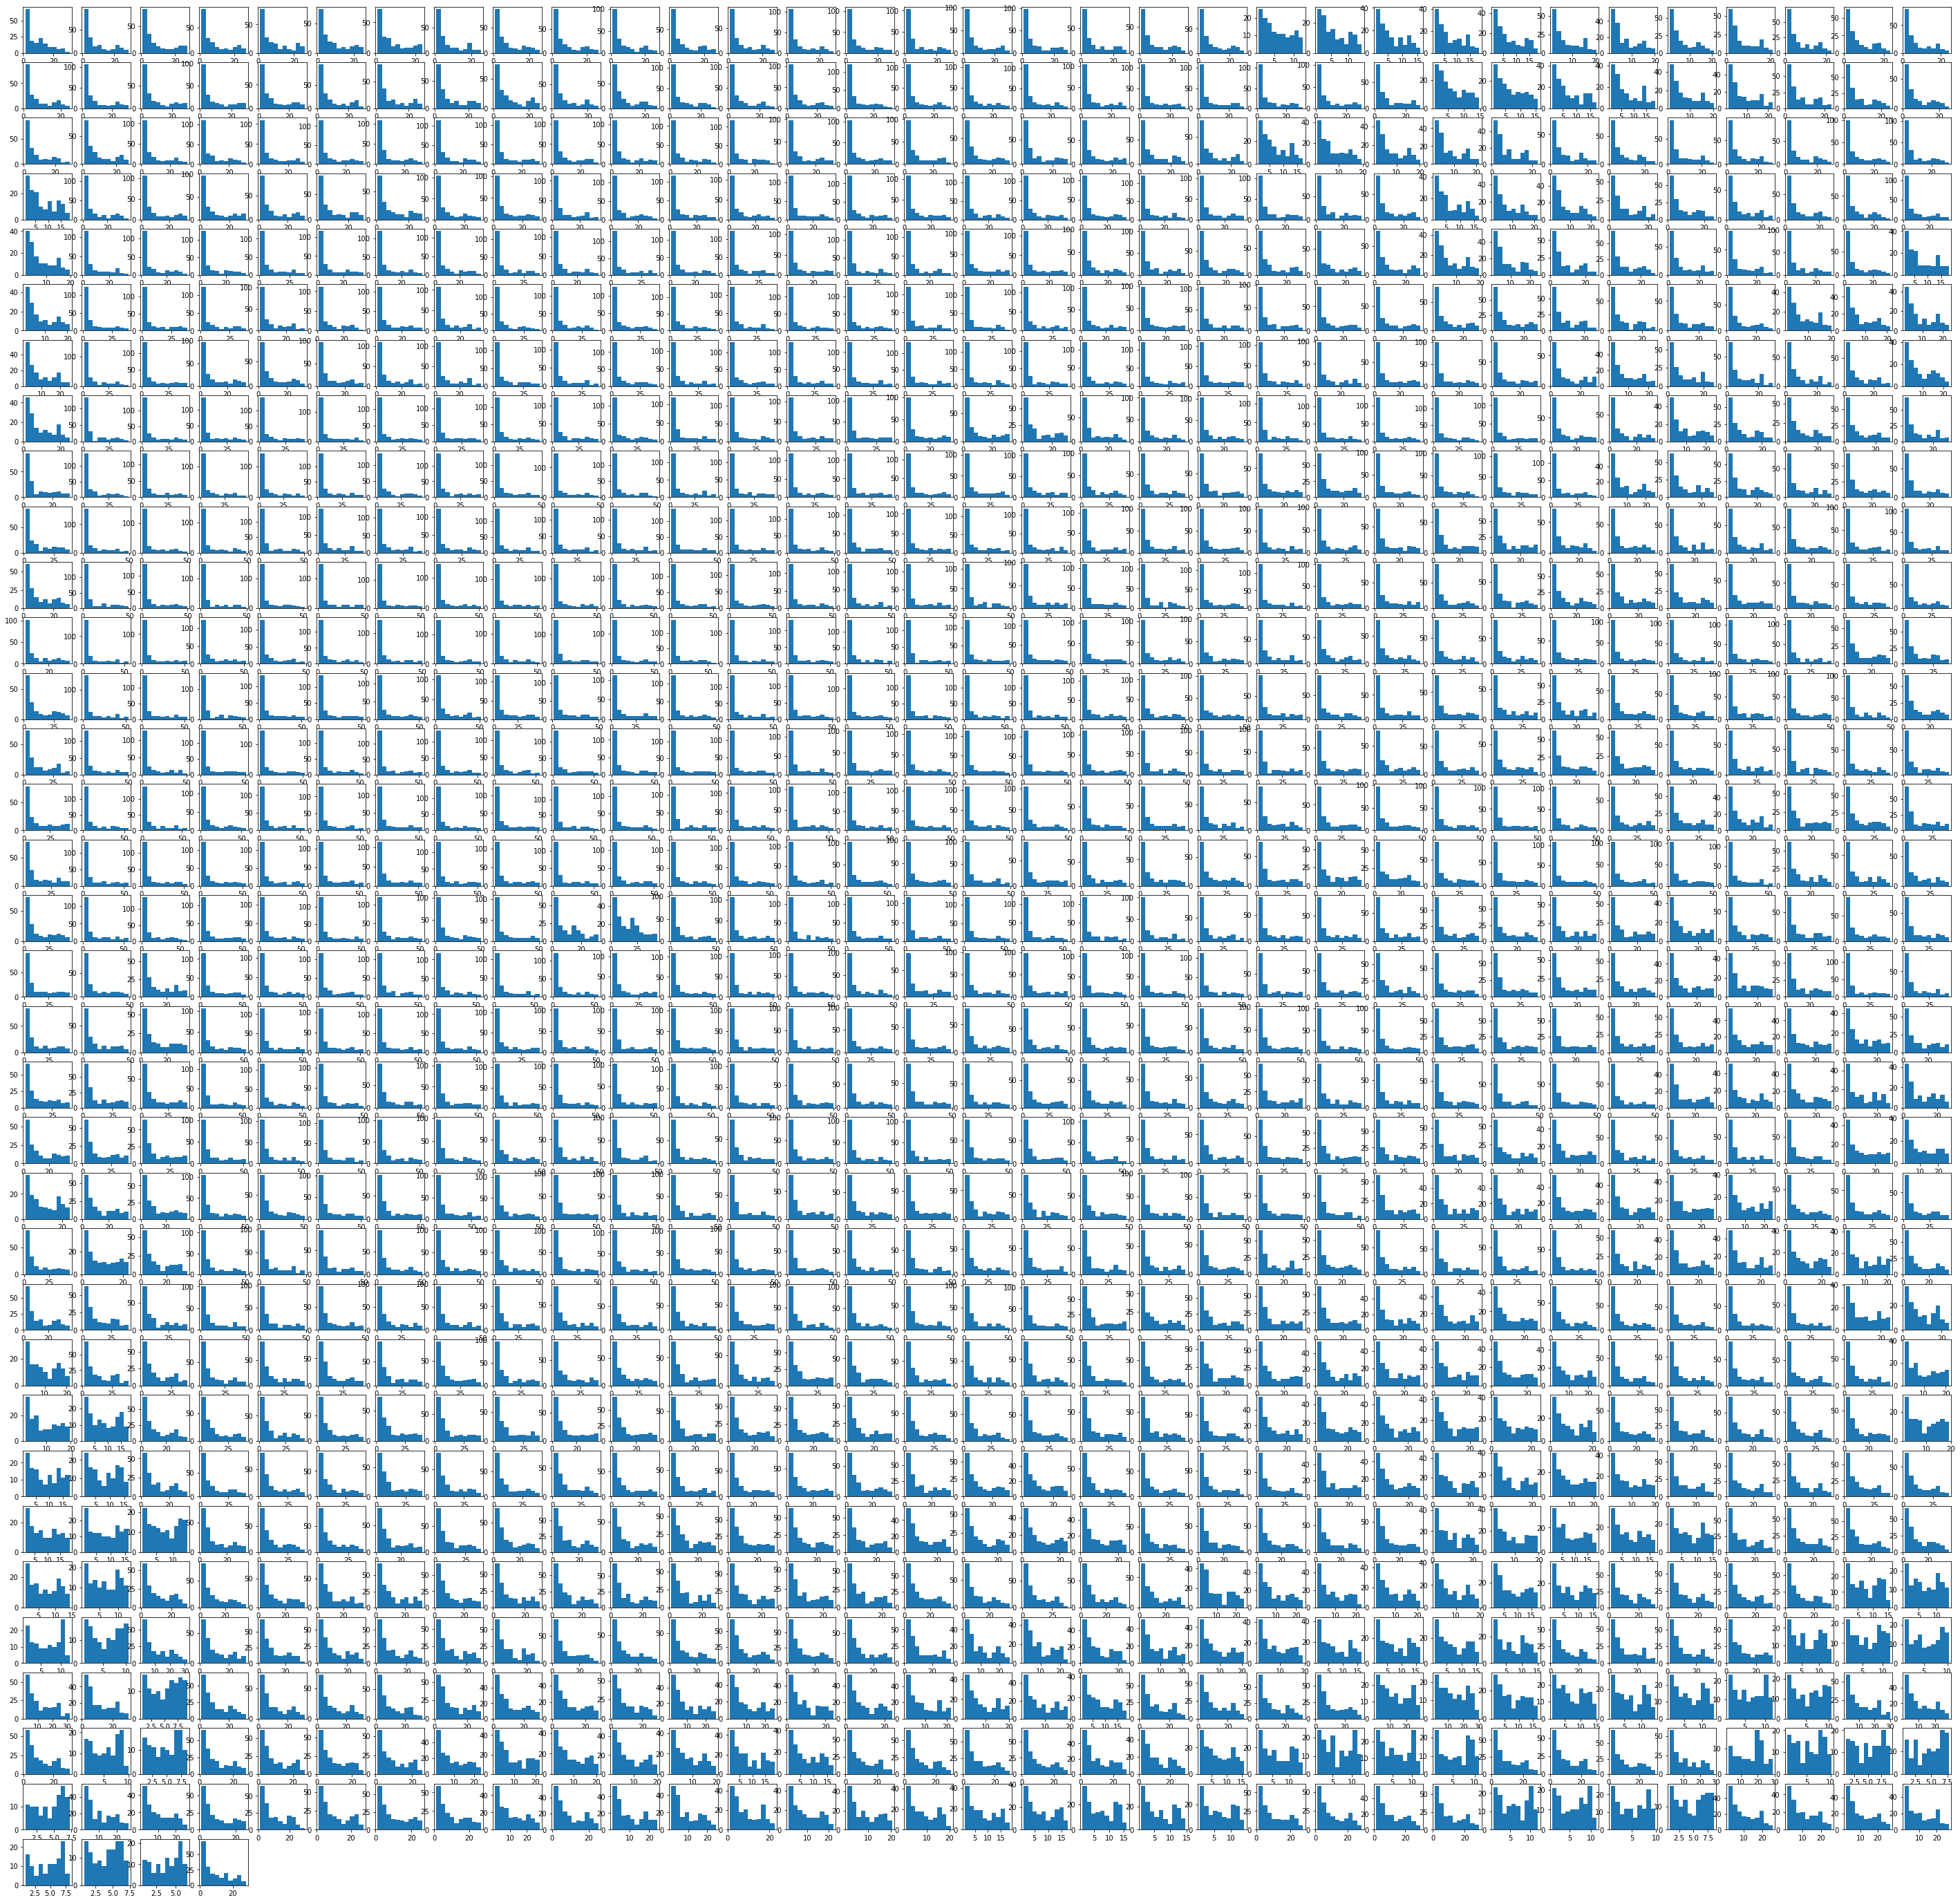

In [438]:
# Measure the intensity distribution of each spot in img_2
plt.figure (figsize = (50,50))
for i in range (0,img2_label.max()):
    plt.subplot(34,33,i+1)
    plt.hist(img2_16b[img2_label==i+1])

4.2 Dynamic range measurement

In [439]:
# Calculate the dynamic range of each spot in img_1
for i in range (1,img1_label.max()+1):
    d_range_im1 = 20*np.log(img1_16b[img1_label==i].max()/img1_16b[img1_label==i].min())
    print('spot', i, 'dynamic range is: ', d_range_im1)

spot 1 dynamic range is:  59.657135009765625
spot 2 dynamic range is:  58.00555229187012
spot 3 dynamic range is:  57.36624717712402
spot 4 dynamic range is:  56.282992362976074
spot 5 dynamic range is:  55.96203804016113
spot 6 dynamic range is:  54.46303367614746
spot 7 dynamic range is:  53.88994216918945
spot 8 dynamic range is:  57.361931800842285
spot 9 dynamic range is:  57.81176567077637
spot 10 dynamic range is:  58.33226680755615
spot 11 dynamic range is:  58.00882339477539
spot 12 dynamic range is:  58.417487144470215
spot 13 dynamic range is:  58.31187725067139
spot 14 dynamic range is:  59.37326908111572
spot 15 dynamic range is:  59.56606388092041
spot 16 dynamic range is:  59.0705680847168
spot 17 dynamic range is:  59.09981727600098
spot 18 dynamic range is:  58.843936920166016
spot 19 dynamic range is:  57.78364181518555
spot 20 dynamic range is:  57.65830039978027
spot 21 dynamic range is:  58.862242698669434
spot 22 dynamic range is:  38.51802110671997
spot 23 dynami

In [440]:
# Calculate the dynamic range of each spot in img_2
for i in range (1,img2_label.max()+1):
    d_range_im2 = 20*np.log(img2_16b[img2_label==i].max()/img2_16b[img2_label==i].min())
    print('spot', i, 'dynamic range is: ', d_range_im2)

spot 1 dynamic range is:  60.96200466156006
spot 2 dynamic range is:  69.7848129272461
spot 3 dynamic range is:  67.95774459838867
spot 4 dynamic range is:  65.12094020843506
spot 5 dynamic range is:  64.49534893035889
spot 6 dynamic range is:  68.39912414550781
spot 7 dynamic range is:  62.467055320739746
spot 8 dynamic range is:  64.99884128570557
spot 9 dynamic range is:  66.07897758483887
spot 10 dynamic range is:  64.6796989440918
spot 11 dynamic range is:  64.5229721069336
spot 12 dynamic range is:  66.42309188842773
spot 13 dynamic range is:  64.70834732055664
spot 14 dynamic range is:  65.66919803619385
spot 15 dynamic range is:  67.50423431396484
spot 16 dynamic range is:  67.25611686706543
spot 17 dynamic range is:  65.73266983032227
spot 18 dynamic range is:  66.5105676651001
spot 19 dynamic range is:  65.84280014038086
spot 20 dynamic range is:  66.69938564300537
spot 21 dynamic range is:  68.00003051757812
spot 22 dynamic range is:  50.20836353302002
spot 23 dynamic range 

4.3 Contrast measurement

In [441]:
# Calculate the contrast of img_1
for i in range (1,img1_label.max()+1):
    contrast = np.average(img1_16b[img1_label==i])-avg_img1_bkg
    print('spot', i, 'contrast to background is: ', contrast)

spot 1 contrast to background is:  10.3129015
spot 2 contrast to background is:  10.449037
spot 3 contrast to background is:  10.527038
spot 4 contrast to background is:  10.04895
spot 5 contrast to background is:  10.410239
spot 6 contrast to background is:  9.97116
spot 7 contrast to background is:  9.451455
spot 8 contrast to background is:  9.340612
spot 9 contrast to background is:  9.609523
spot 10 contrast to background is:  9.5640545
spot 11 contrast to background is:  9.458298
spot 12 contrast to background is:  9.966566
spot 13 contrast to background is:  9.977249
spot 14 contrast to background is:  9.762471
spot 15 contrast to background is:  10.057674
spot 16 contrast to background is:  10.014269
spot 17 contrast to background is:  10.379217
spot 18 contrast to background is:  10.139457
spot 19 contrast to background is:  10.482242
spot 20 contrast to background is:  10.288259
spot 21 contrast to background is:  10.518399
spot 22 contrast to background is:  5.3441305
spot 2

In [442]:
# Calculate the contrast of img_2
for i in range (1,img2_label.max()+1):
    contrast = np.average(img2_16b[img2_label==i])-avg_img2_bkg
    print('spot', i, 'contrast to background is: ', contrast)

spot 1 contrast to background is:  8.754975
spot 2 contrast to background is:  7.8281255
spot 3 contrast to background is:  8.001665
spot 4 contrast to background is:  7.6422524
spot 5 contrast to background is:  7.9451575
spot 6 contrast to background is:  7.665937
spot 7 contrast to background is:  7.3388886
spot 8 contrast to background is:  6.8827333
spot 9 contrast to background is:  7.01644
spot 10 contrast to background is:  7.080804
spot 11 contrast to background is:  6.90864
spot 12 contrast to background is:  7.236561
spot 13 contrast to background is:  7.366984
spot 14 contrast to background is:  7.2727723
spot 15 contrast to background is:  7.39906
spot 16 contrast to background is:  7.4582553
spot 17 contrast to background is:  7.884969
spot 18 contrast to background is:  7.7220654
spot 19 contrast to background is:  8.056236
spot 20 contrast to background is:  7.768597
spot 21 contrast to background is:  7.8561263
spot 22 contrast to background is:  4.9375386
spot 23 cont

4.4 Sharpness measurement

ref: https://www.mathworks.com/matlabcentral/fileexchange/32397-sharpness-estimation-from-image-gradients

In [277]:
from skimage.measure import regionprops

In [445]:
# Calculate the sharpness of img_1
props_im1 = regionprops(img1_label, img1_16b)
for i in range (0,img1_label.max()):
    gy, gx = np.gradient (props_im1[i].intensity_image)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    print('spot', i+1, 'sharpness is: ', sharpness)

spot 1 sharpness is:  3.6842346
spot 2 sharpness is:  3.5447307
spot 3 sharpness is:  3.6872957
spot 4 sharpness is:  3.4161954
spot 5 sharpness is:  3.5868905
spot 6 sharpness is:  3.3078744
spot 7 sharpness is:  3.1016908
spot 8 sharpness is:  3.3097477
spot 9 sharpness is:  3.4622319
spot 10 sharpness is:  3.490974
spot 11 sharpness is:  3.2939563
spot 12 sharpness is:  3.6062243
spot 13 sharpness is:  3.5500133
spot 14 sharpness is:  3.4904058
spot 15 sharpness is:  3.621618
spot 16 sharpness is:  3.5459032
spot 17 sharpness is:  3.774707
spot 18 sharpness is:  3.521256
spot 19 sharpness is:  3.8404658
spot 20 sharpness is:  3.6926792
spot 21 sharpness is:  3.73459
spot 22 sharpness is:  1.9808041
spot 23 sharpness is:  2.1935816
spot 24 sharpness is:  2.5306704
spot 25 sharpness is:  2.547979
spot 26 sharpness is:  2.613196
spot 27 sharpness is:  2.6939445
spot 28 sharpness is:  2.9168837
spot 29 sharpness is:  2.9781282
spot 30 sharpness is:  3.1819835
spot 31 sharpness is:  3.27

In [446]:
# Calculate the sharpness of img_2
props_im2 = regionprops(img2_label, img2_16b)
for i in range (0,img2_label.max()):
    gy, gx = np.gradient (props_im2[i].intensity_image)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    print('spot', i+1, 'sharpness is: ', sharpness)

spot 1 sharpness is:  3.0589762
spot 2 sharpness is:  2.7729156
spot 3 sharpness is:  2.9271133
spot 4 sharpness is:  2.7426307
spot 5 sharpness is:  2.8550262
spot 6 sharpness is:  2.6966696
spot 7 sharpness is:  2.5193374
spot 8 sharpness is:  2.4670382
spot 9 sharpness is:  2.5891109
spot 10 sharpness is:  2.6361876
spot 11 sharpness is:  2.4498546
spot 12 sharpness is:  2.702616
spot 13 sharpness is:  2.7137399
spot 14 sharpness is:  2.694218
spot 15 sharpness is:  2.7543778
spot 16 sharpness is:  2.7531512
spot 17 sharpness is:  2.9770935
spot 18 sharpness is:  2.7916615
spot 19 sharpness is:  3.0499413
spot 20 sharpness is:  2.916566
spot 21 sharpness is:  2.8978262
spot 22 sharpness is:  1.7929982
spot 23 sharpness is:  1.8328944
spot 24 sharpness is:  2.0037365
spot 25 sharpness is:  2.298027
spot 26 sharpness is:  2.2558162
spot 27 sharpness is:  2.3145623
spot 28 sharpness is:  2.272604
spot 29 sharpness is:  2.2896862
spot 30 sharpness is:  2.343393
spot 31 sharpness is:  2.